In [74]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns  


In [75]:
df = pd.read_csv('Social_Network_Ads.csv')

In [76]:
df = df.iloc[: , 2:] #Column starts from 2

In [77]:
df.sample(5)

,Age,EstimatedSalary,Purchased
240,42,149000,1
151,41,45000,0
173,34,43000,0
319,36,60000,0
249,35,97000,1


## Train test split

```
axis = 1 means Columnwise
It divides the DataFrame into training and test sets, 
using all columns except "Purchased" (dropped along axis=1) as features (X), 
and 
"Purchased" as the target (y). 
target (y) is going to be predict
```

In [78]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(df.drop('Purchased' , axis=1) , df['Purchased'] , test_size = 0.3 , random_state = 0)
X_train.shape , X_test.shape

((280, 2), (120, 2))

# StandardScaler

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Fitting the scaler to train set, it will learn the parameters
scaler.fit(X_train)

#transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [80]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

```
learn from train
but transform train,test both
```

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

ValueError: could not convert string to float: 'Female'

In [42]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [41]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [43]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

```Converting scaled arrays to dataframes
```

```Converting scaled arrays to dataframes```

In [9]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [10]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


```
Scaling is done by mean = 0 , standard_deviation = 1
```

In [11]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effect of Scaling

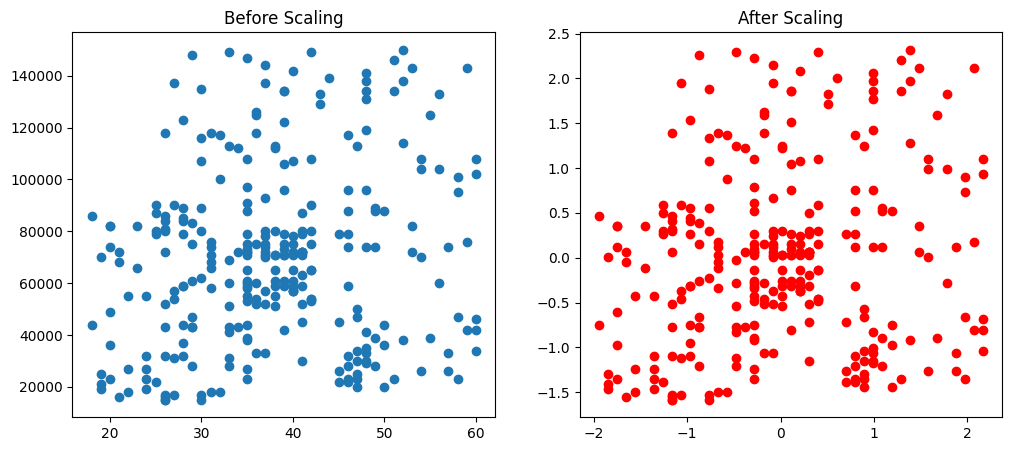

In [39]:
fig, (ax1,ax2) = plt.subplots(ncols=2 , figsize=(12,5))

ax1.scatter(X_train['Age'] , X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
# ax1.legend()


ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
# ax2.legend()
    
plt.show()

```
After scaling, the graphs become comparable
```

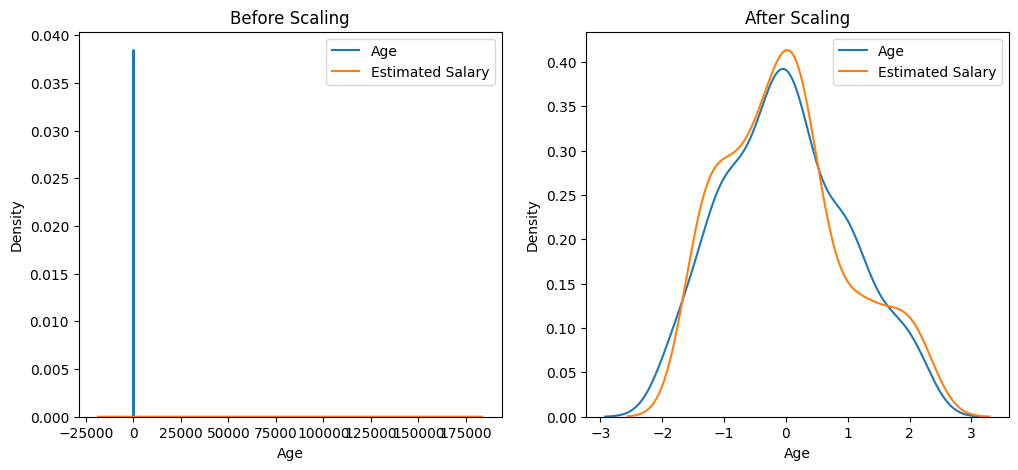

In [40]:
fig, (ax1,ax2) = plt.subplots(ncols=2 , figsize=(12,5))

sns.kdeplot(X_train['Age'] , ax=ax1 , label='Age')
sns.kdeplot(X_train['EstimatedSalary'] , ax=ax1 , label='Estimated Salary')
ax1.set_title('Before Scaling')
ax1.legend()

sns.kdeplot(X_train_scaled['Age'] , ax=ax2 , label='Age')
sns.kdeplot(X_train_scaled['EstimatedSalary'] , ax=ax2 , label='Estimated Salary')
ax2.set_title('After Scaling')
ax2.legend()

plt.show()

# Comparison of Distributions

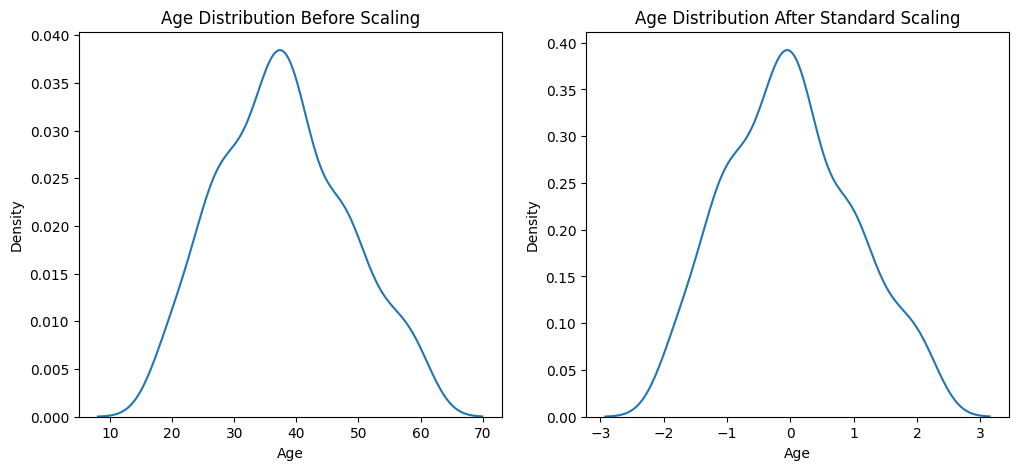

In [41]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

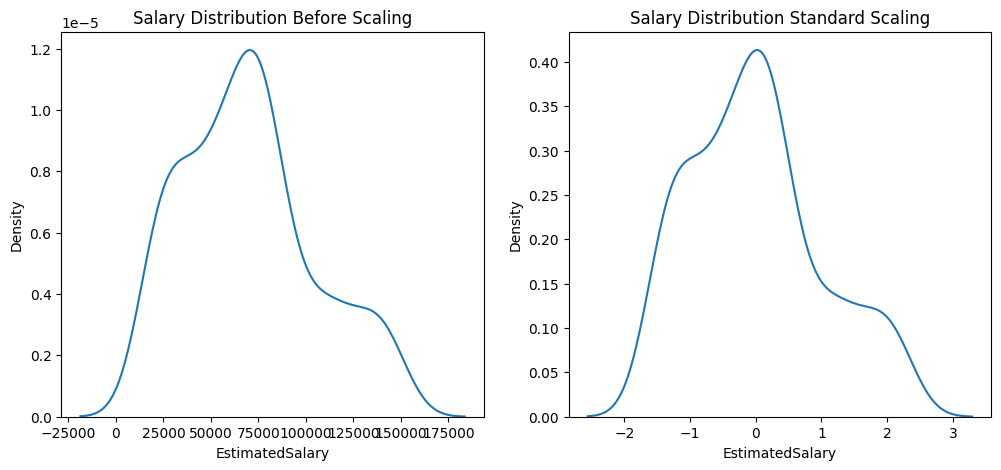

In [42]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Why scaling is important?

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [45]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [36]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [52]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [54]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

##### Decision tree has no effect of scaling

In [55]:
print("Actual", accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.875


In [29]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# Effect of Outlier

In [63]:
df = pd.concat([df ,pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]})],ignore_index=True)

In [64]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510.0,Male,19,19000,0
1,15810944.0,Male,35,20000,0
2,15668575.0,Female,26,43000,0
3,15603246.0,Female,27,57000,0
4,15804002.0,Male,19,76000,0
...,...,...,...,...,...
398,15755018.0,Male,36,33000,0
399,15594041.0,Female,49,36000,1
400,NaN,NaN,5,1000,0
401,NaN,NaN,90,250000,1


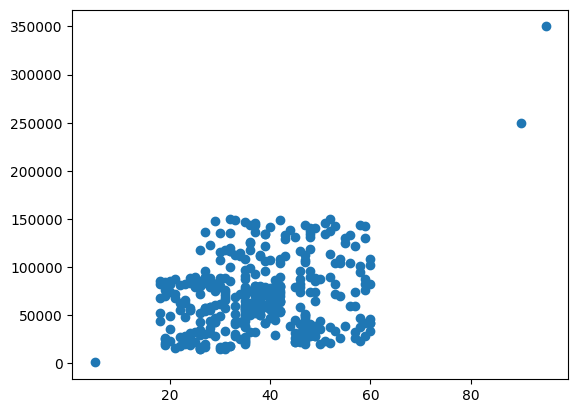

In [65]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 4), (121, 4))

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [82]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

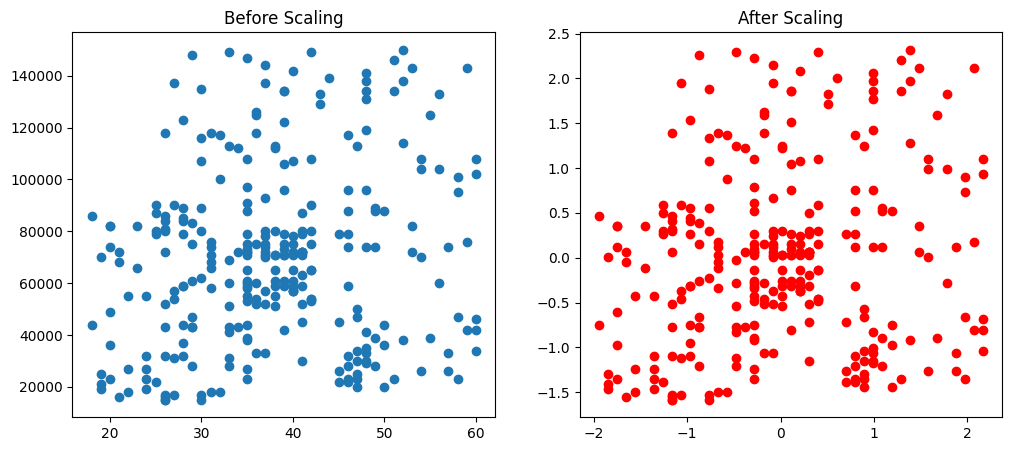

In [83]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()